In [1]:
# 說明：設置環境、import 套件
import math
import pandas as pd
import numpy as np
import pprint 
import matplotlib.pyplot as plt
from matplotlib import pylab
%pylab inline
#plt.style.use('ㄎ')
pylab.rcParams['figure.figsize'] = (20, 8)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# color sets
cPurple = '#5628B4'
cLightPurple = '#9590D0'
cRed = '#D2553E'
cGreen = '#98B855'

In [3]:
import matplotlib.font_manager as fm 
myfont = fm.FontProperties( fname="/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc")   

In [4]:
# Global variables
CostRate = 3 # 一度電多少錢（估算，實際還要再確認）

### 原始資料說明 - 1
- 區間：20170801-20180131，一整個上學期(包含暑假後段一小部分及寒假前段一小部分)
- 間隔：一小時一筆
- 地點：所有的學生宿舍，以下我是針對十舍做
- 一個地點的筆數：4409筆
- 總筆數 =48499 筆

In [5]:
# 以下讀的資料是經過離群值處理以及新增欄位過後的
filename = '[Detailed][new]Dorm10_hour_20170801_20180131.csv'
file = open('./Electricity_analytics-2017/02dataset/'+filename, encoding = 'utf8')
df = pd.read_csv(file)
path = './Electricity_analytics-2017/02dataset/'
del df['Unnamed: 0']
df.head()

,DateTime,Area,Building,Loop,Type,Usage,Date,Weekday,Week,Time,Cost,DayName
0,2017/08/01 00:00,N,D10,main,dorm,37.75,2017-08-01,2,31,00:00,113.25,Tuesday
1,2017/08/01 01:00,N,D10,main,dorm,27.88,2017-08-01,2,31,01:00,83.64,Tuesday
2,2017/08/01 02:00,N,D10,main,dorm,25.25,2017-08-01,2,31,02:00,75.75,Tuesday
3,2017/08/01 03:00,N,D10,main,dorm,24.88,2017-08-01,2,31,03:00,74.64,Tuesday
4,2017/08/01 04:00,N,D10,main,dorm,23.38,2017-08-01,2,31,04:00,70.14,Tuesday


### 切割資料
- 若發現資料太龐大，導致畫出的圖太擠，則使用下面這個cell切割資料

In [6]:
# 苦思想不到方法，只好手動分割 :P
df1 = df.loc[df['Week'].isin(['31', '32', '33', '34', '35', '36', '37'])]
df2 = df.loc[df['Week'].isin(['38', '39', '40', '41', '42', '43', '44'])]
df3 = df.loc[df['Week'].isin(['45', '46', '47', '48', '49', '50', '51'])]
df4 = df.loc[df['Week'].isin(['52', '1', '2', '3', '4', '5'])]

In [12]:
#df1時段: 2017-08-01 ~ 2017-09-17
#df2時段: 2017-09-18 ~ 2017-11-05
#df3時段: 2017-11-06 ~ 2017-12-24
#df4時段: 2017-12-25 ~ 2018-01-31

### 圖一：每個小時的用電，106學年度上學期（Line Plot）
#### 觀察
- 週末的時候（藍線最高點），通常用電比較低
- 圖片中間有個低潮，猜測是國慶連假
- 隨著冬天而下降
- 資料波動大

Text(0.5,0,'Index')

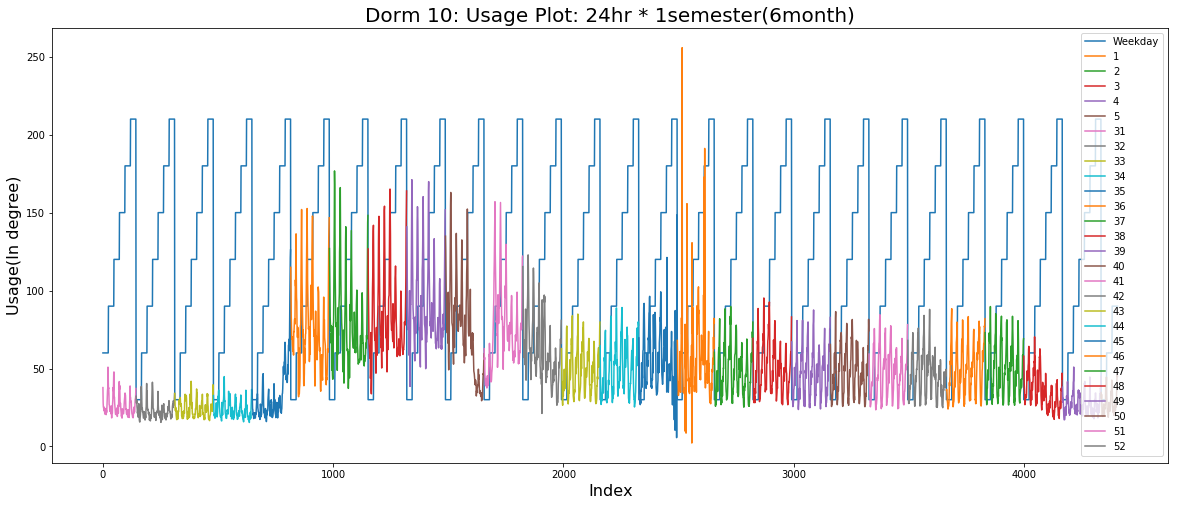

In [14]:
(df.Weekday * 30).plot(legend = True)
df.groupby(['Week']).Usage.plot(legend = True)
plt.title('Dorm 10: Usage Plot: 24hr * 1semester(6month)', fontsize = 20)
pylab.ylabel('Usage(In degree)',fontsize = 16)
pylab.xlabel('Index',fontsize = 16)


## 圖集一 : 10舍上學期--每周用電變化圖與分析

### 觀察到的現象 :
- 31周至35周用電量非常少，代表此時還未開學；35周的六、日用電開始飆高，此時應是開學時學生陸陸續續搬進宿舍的時候(9/2、9/3)
- 40周至41周之間(10/8~10/10)用電量下跌，推測應是國慶假日放假
- 第四張圖 - 第52周至第1周之間(12/31~1/1)，也有小跌，推測是元旦放假。
- 第四張圖 - 第3周的星期四(1/18)用電量開始減少，應是學生開始放寒假的時候。
- 隨著冬天的到來，用電也漸漸降低

### 疑惑 :
- 第三張圖 - 第46周(11/13~11/19)用電起伏落差極大，原因未知。(推測網路不穩造成)


Week
1     AxesSubplot(0.547727,0.125;0.352273x0.343182)
2     AxesSubplot(0.547727,0.125;0.352273x0.343182)
3     AxesSubplot(0.547727,0.125;0.352273x0.343182)
4     AxesSubplot(0.547727,0.125;0.352273x0.343182)
5     AxesSubplot(0.547727,0.125;0.352273x0.343182)
52    AxesSubplot(0.547727,0.125;0.352273x0.343182)
Name: Usage, dtype: object

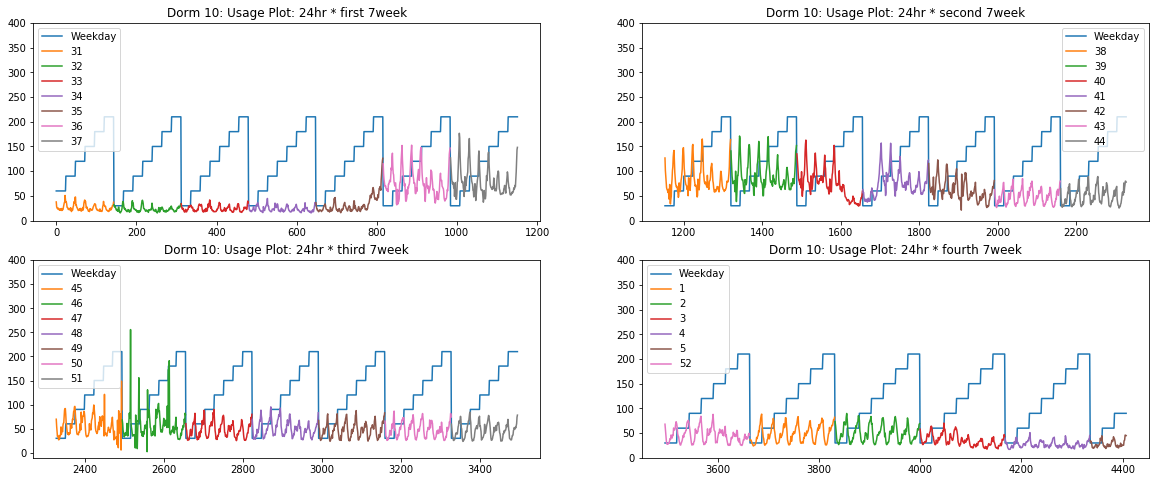

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2)

y_index = [0, 50, 100, 150, 200, 250, 300, 350, 400]

(df1.Weekday * 30).plot(ax = axes[0,0], legend = True)
df1.groupby(['Week']).Usage.plot(ax = axes[0,0], title = 'Dorm 10: Usage Plot: 24hr * first 7week',
                                             legend = True, yticks = y_index)
#df1_chart.set(xlabel="Index", ylabel="Usage(In degree)")

(df2.Weekday * 30).plot(ax = axes[0,1], legend = True)
df2.groupby(['Week']).Usage.plot(ax = axes[0,1], title = 'Dorm 10: Usage Plot: 24hr * second 7week', 
                                             legend = True, yticks = y_index)
#df2_chart.set(xlabel="Index", ylabel="Usage(In degree)")

(df3.Weekday * 30).plot(ax = axes[1,0], legend = True)
df3.groupby(['Week']).Usage.plot(ax = axes[1,0], title = 'Dorm 10: Usage Plot: 24hr * third 7week', 
                                             legend = True, yticks = y_index)
#df3_chart.set(xlabel="Index", ylabel="Usage(In degree)")

(df4.Weekday * 30).plot(ax = axes[1,1], legend = True)
df4.groupby(['Week']).Usage.plot(ax = axes[1,1], title = 'Dorm 10: Usage Plot: 24hr * fourth 7week', 
                                             legend = True, yticks = y_index)
#df4_chart.set(xlabel="Index", ylabel="Usage(In degree)")


Week
31    AxesSubplot(0.125,0.125;0.775x0.755)
32    AxesSubplot(0.125,0.125;0.775x0.755)
33    AxesSubplot(0.125,0.125;0.775x0.755)
34    AxesSubplot(0.125,0.125;0.775x0.755)
35    AxesSubplot(0.125,0.125;0.775x0.755)
36    AxesSubplot(0.125,0.125;0.775x0.755)
37    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Usage, dtype: object

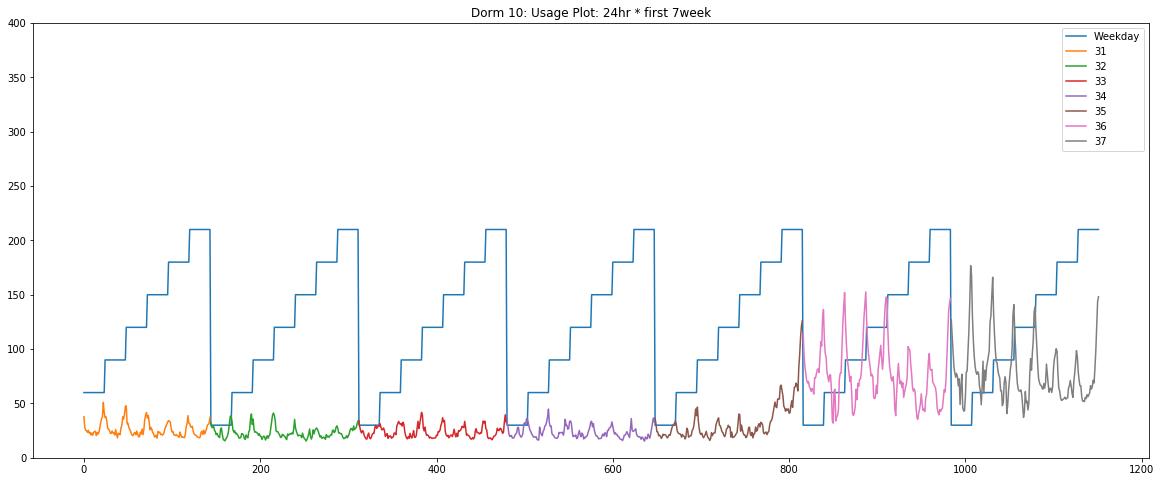

In [29]:
y_index = [0, 50, 100, 150, 200, 250, 300, 350, 400]

(df1.Weekday * 30).plot(legend = True)
df1.groupby(['Week']).Usage.plot(title = 'Dorm 10: Usage Plot: 24hr * first 7week',
                                             legend = True, yticks = y_index)

Week
38    AxesSubplot(0.125,0.125;0.775x0.755)
39    AxesSubplot(0.125,0.125;0.775x0.755)
40    AxesSubplot(0.125,0.125;0.775x0.755)
41    AxesSubplot(0.125,0.125;0.775x0.755)
42    AxesSubplot(0.125,0.125;0.775x0.755)
43    AxesSubplot(0.125,0.125;0.775x0.755)
44    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Usage, dtype: object

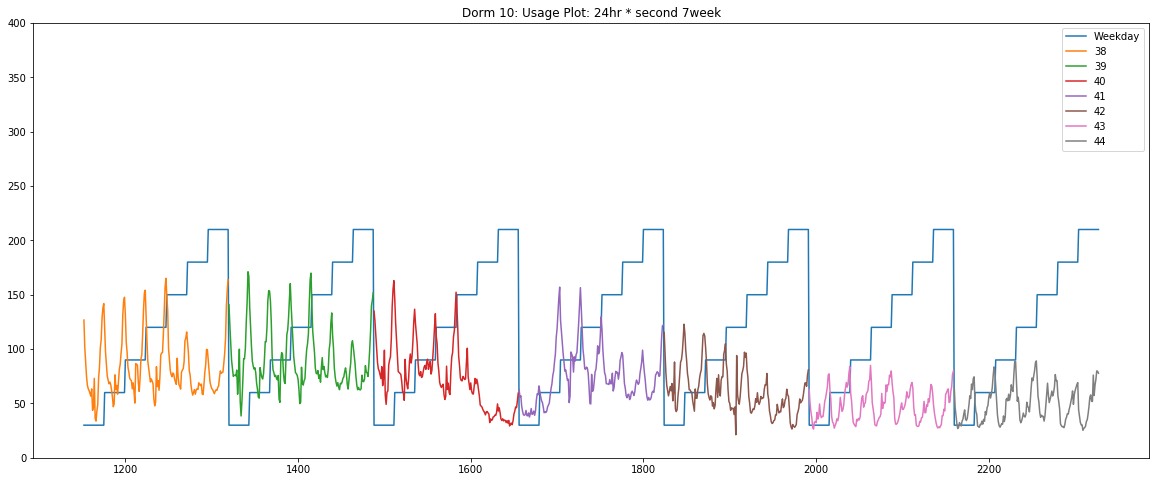

In [28]:
y_index = [0, 50, 100, 150, 200, 250, 300, 350, 400]

(df2.Weekday * 30).plot(legend = True)
df2.groupby(['Week']).Usage.plot(title = 'Dorm 10: Usage Plot: 24hr * second 7week', 
                                             legend = True, yticks = y_index)

Week
45    AxesSubplot(0.125,0.125;0.775x0.755)
46    AxesSubplot(0.125,0.125;0.775x0.755)
47    AxesSubplot(0.125,0.125;0.775x0.755)
48    AxesSubplot(0.125,0.125;0.775x0.755)
49    AxesSubplot(0.125,0.125;0.775x0.755)
50    AxesSubplot(0.125,0.125;0.775x0.755)
51    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Usage, dtype: object

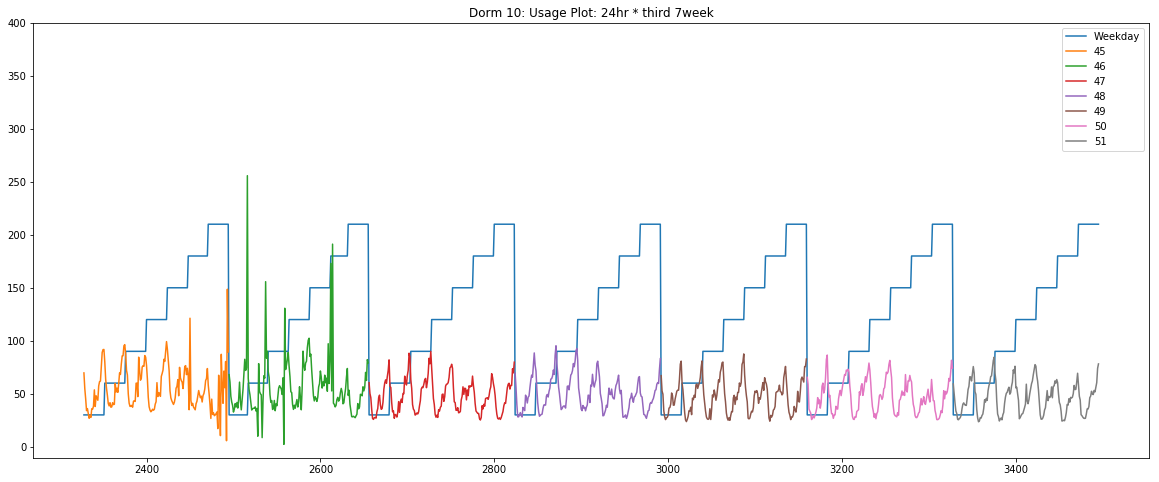

In [27]:
y_index = [0, 50, 100, 150, 200, 250, 300, 350, 400]

(df3.Weekday * 30).plot(legend = True)
df3.groupby(['Week']).Usage.plot(title = 'Dorm 10: Usage Plot: 24hr * third 7week', 
                                             legend = True, yticks = y_index)

Week
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
52    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Usage, dtype: object

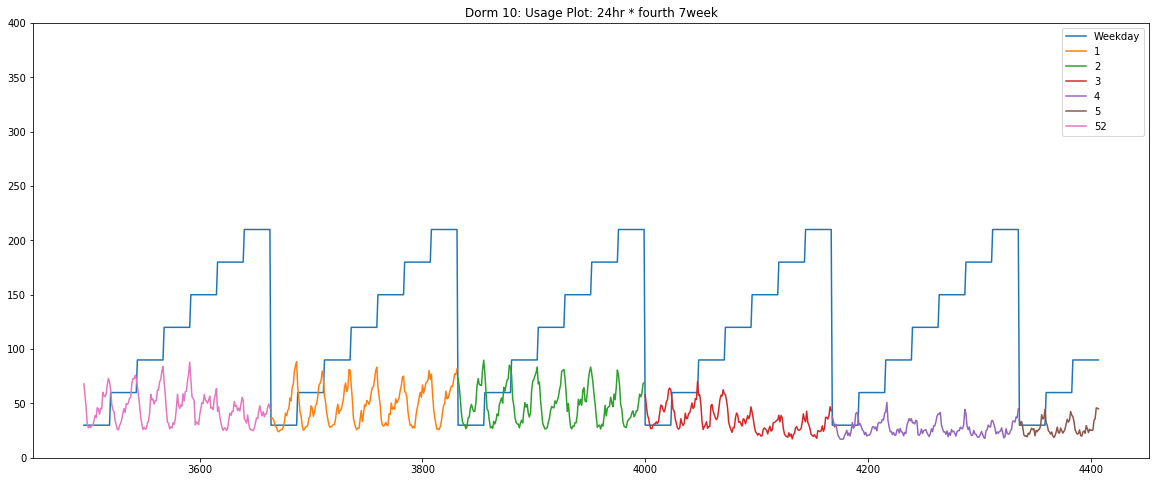

In [26]:
y_index = [0, 50, 100, 150, 200, 250, 300, 350, 400]

(df4.Weekday * 30).plot(legend = True)
df4.groupby(['Week']).Usage.plot(title = 'Dorm 10: Usage Plot: 24hr * fourth 7week', 
                                             legend = True, yticks = y_index)

Week
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
31    AxesSubplot(0.125,0.125;0.775x0.755)
32    AxesSubplot(0.125,0.125;0.775x0.755)
33    AxesSubplot(0.125,0.125;0.775x0.755)
34    AxesSubplot(0.125,0.125;0.775x0.755)
35    AxesSubplot(0.125,0.125;0.775x0.755)
36    AxesSubplot(0.125,0.125;0.775x0.755)
37    AxesSubplot(0.125,0.125;0.775x0.755)
38    AxesSubplot(0.125,0.125;0.775x0.755)
39    AxesSubplot(0.125,0.125;0.775x0.755)
40    AxesSubplot(0.125,0.125;0.775x0.755)
41    AxesSubplot(0.125,0.125;0.775x0.755)
42    AxesSubplot(0.125,0.125;0.775x0.755)
43    AxesSubplot(0.125,0.125;0.775x0.755)
44    AxesSubplot(0.125,0.125;0.775x0.755)
45    AxesSubplot(0.125,0.125;0.775x0.755)
46    AxesSubplot(0.125,0.125;0.775x0.755)
47    AxesSubplot(0.125,0.125;0.775x0.755)
48    AxesSubplot(0.125,0.125;0.775x0.755)
49    

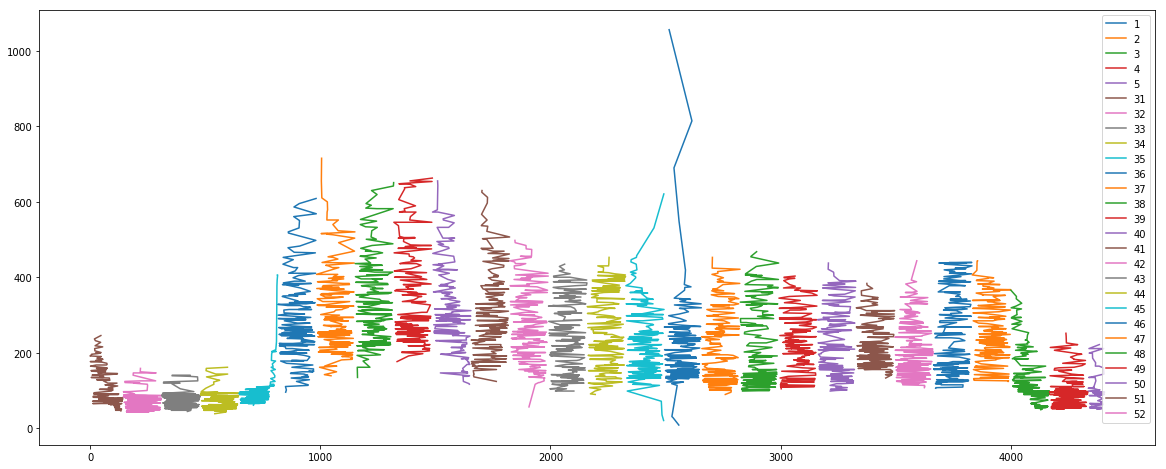

In [89]:
df.sort_values('Cost').groupby(['Week']).Cost.plot(legend = True)

### 圖二：最高日用電 
討論極端值的成因

Text(0.5,0,'Date')

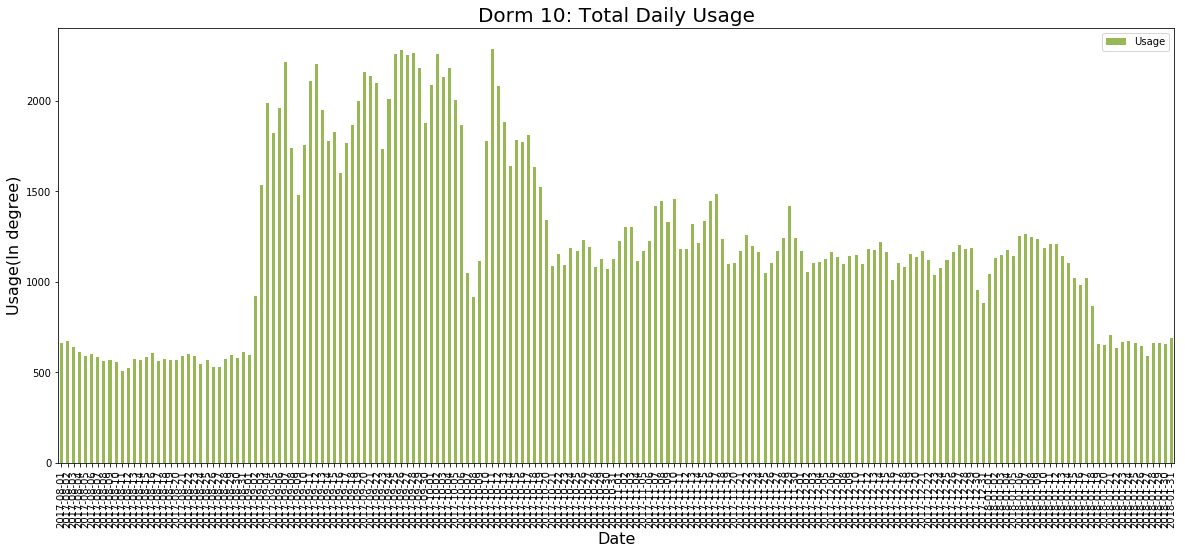

In [25]:
df_dorm_12_dailysum = df.groupby('Date').sum()
df_dorm_12_dailysum.Weekday = df_dorm_12_dailysum.Weekday/24
df_dorm_12_dailysum.Usage.plot.bar(legend = True,color = cGreen)
plt.title('Dorm 10: Total Daily Usage', fontsize = 20)
pylab.ylabel('Usage(In degree)',fontsize = 16)
pylab.xlabel('Date',fontsize = 16)

In [21]:
# 最高用電的幾天是...
# 為什麼這幾天會比較高呢？
print('Top 10 daily TOTAL use of dorm 12. From 9.01 - 11.10')
print(df_dorm_12_dailysum.sort_values('Usage')[-10:])
# print('Top 10 daily AVERAGE use of dorm 12. From 9.01 - 11.10')
# print(df_dorm_12_dailymean_sorted[-10:])

Top 10 daily TOTAL use of dorm 12. From 9.01 - 11.10
              Usage  Weekday  Week     Cost
Date                                       
2017-10-04  2179.03      3.0   960  6537.09
2017-09-29  2183.04      5.0   936  6549.12
2017-09-12  2204.65      2.0   888  6613.95
2017-09-07  2213.34      4.0   864  6640.02
2017-09-27  2253.76      3.0   936  6761.28
2017-09-25  2255.65      1.0   936  6766.95
2017-10-02  2259.02      1.0   960  6777.06
2017-09-28  2263.91      4.0   936  6791.73
2017-09-26  2278.96      2.0   936  6836.88
2017-10-11  2288.05      3.0   984  6864.15


觀察：其實最高用電的前十個日子，大多發生在九月十月，而且有連續的現象！

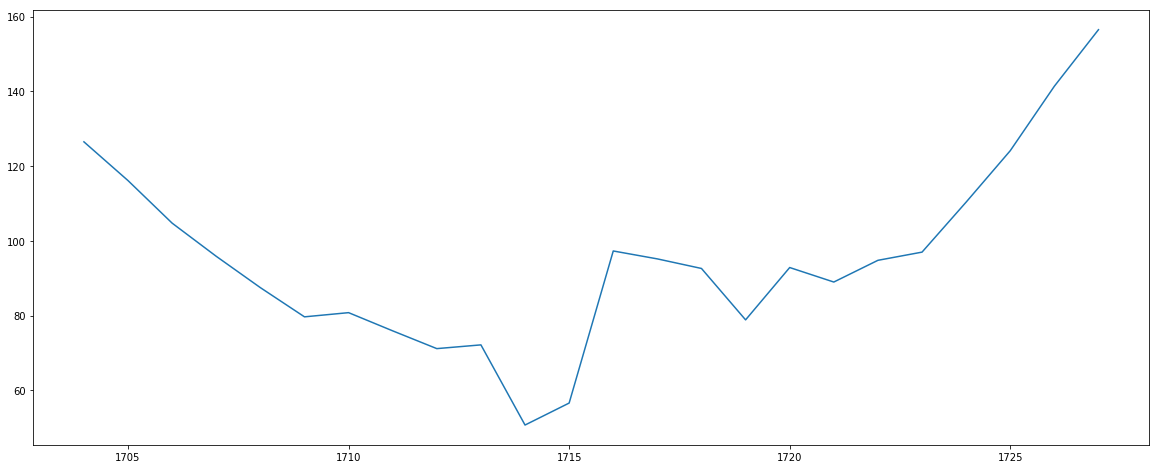

In [22]:
# 10.11 的用電繪圖
df[df.Date == '2017-10-11'].Usage.plot()
# xticks = list(df_dorm_12.Time.unique()) # bug to fix!!
# 不正常的地方：中午高峰

In [70]:
# 哪小時最耗電？
df.sort_values('Usage')[-100:].Time.value_counts()

22:00    26
23:00    24
21:00    19
00:00    13
20:00     9
19:00     4
01:00     3
06:00     1
03:00     1
Name: Time, dtype: int64

,DateTime,Area,Building,Loop,Type,Usage,Date,Weekday,Week,Time,Cost
2516,2017/11/13 23:00,N,D10,main,dorm,255.81,2017-11-13,1,46,23:00,767.43


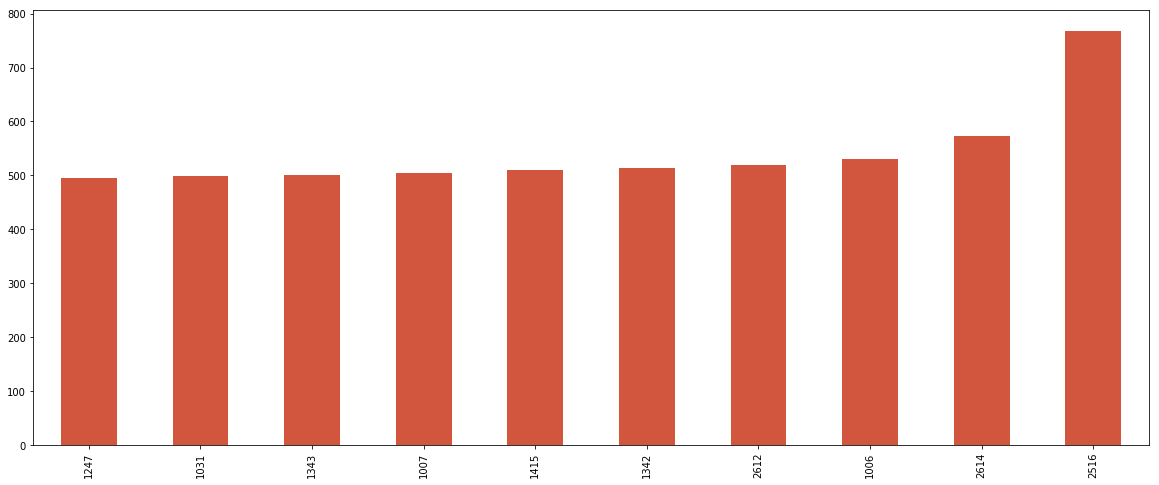

In [23]:
# Top 10 用電
# 看一下特高用電有多誇張，結果其實還好
df.sort_values('Usage')[-10:].Cost.plot.bar(color = cRed)
#發現有一小時真的特耗電

df.sort_values('Usage')[-1:]
# 2017/09/11 22:00 用電是 238.5, (12舍平均用電是96)
# 這個有辦法更改x軸的index嗎? 想改成 Datetime 或 Date

2017/9/11 為什麼用那麼多電呢？
我去查了日曆，原來是開學日的十點（一起打電動？煮火鍋？）

In [24]:
# 這裡我看不太懂~~~
# 五十天中，星期幾最耗電？
df.groupby('Date').mean().sort_values('Usage')[-50:].Weekday.value_counts()

5    8
4    8
3    8
2    7
1    7
7    6
6    6
Name: Weekday, dtype: int64

## 圖三：平均用電變化 - 依Weekday看
### 觀察
- 週六大家回家，平均用電最低
- 週日回宿舍，用電比週六高
- 週三跟週四用電量最高

([<matplotlib.axis.XTick at 0x1eac974ab38>,
 <a list of 7 Text xticklabel objects>)

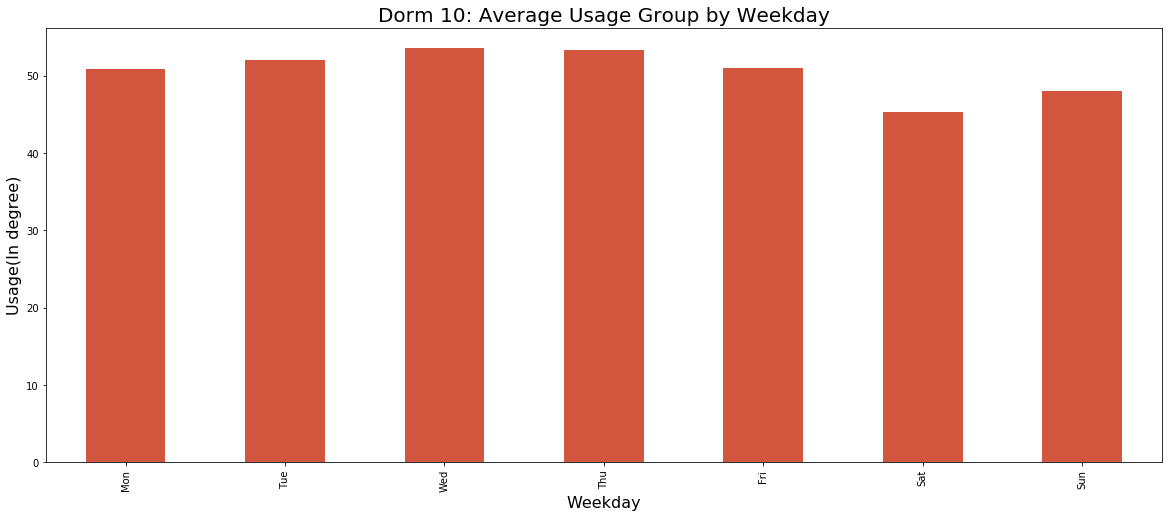

In [14]:
x_index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

df_dorm_12_byWeekday = df.groupby('Weekday').mean()
df_dorm_12_byWeekday.Usage.plot.bar(legend = False, color = cRed)

plt.title('Dorm 10: Average Usage Group by Weekday', fontsize = 20)
pylab.ylabel('Usage(In degree)',fontsize = 16)
pylab.xlabel('Weekday',fontsize = 16)
plt.xticks(np.arange(7), x_index)


## 圖集四：各週用電變化 - 依Weekday看
### 觀察到的現象
- 第一張圖 - 35周的周末用電量提高，估計36周開始便是開學期間
- 第一張圖 - 31周的用電量普遍比同樣在暑假期間的其他周還要來的高，但沒12舍明顯
- 第四張圖 - 因為資料只節錄到2018-01-31，因此第5周的周四以後皆缺值
- 其餘與以上圖表相同

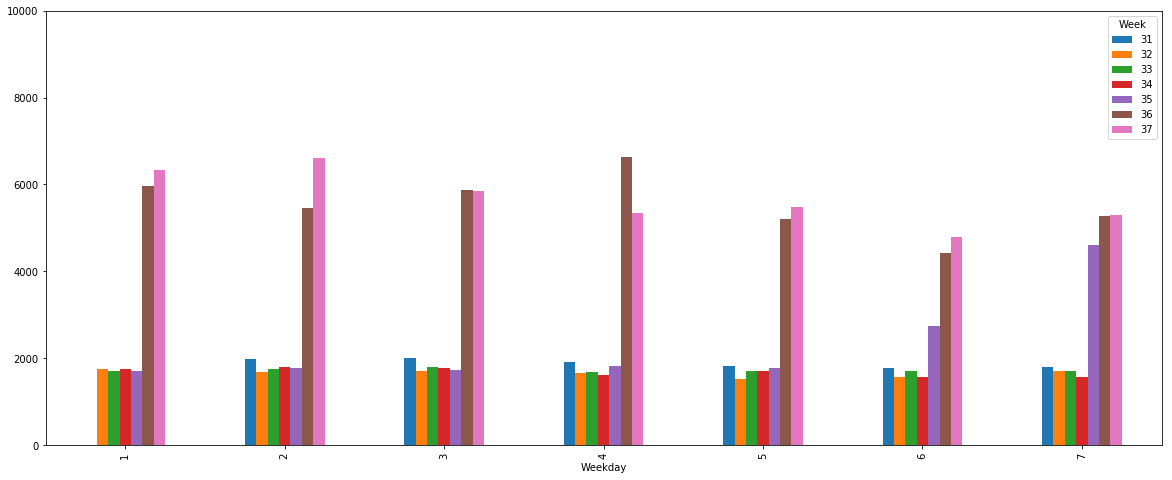

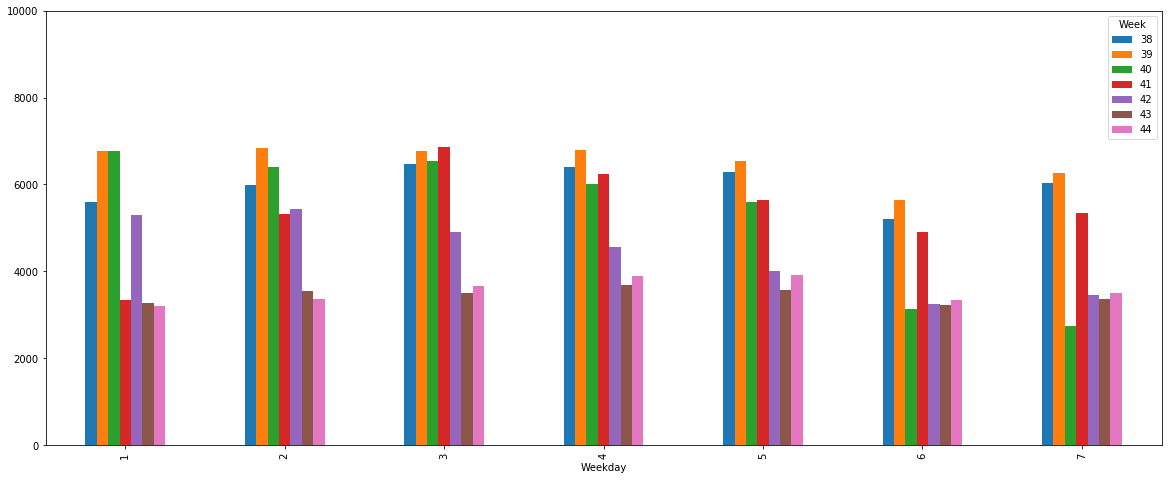

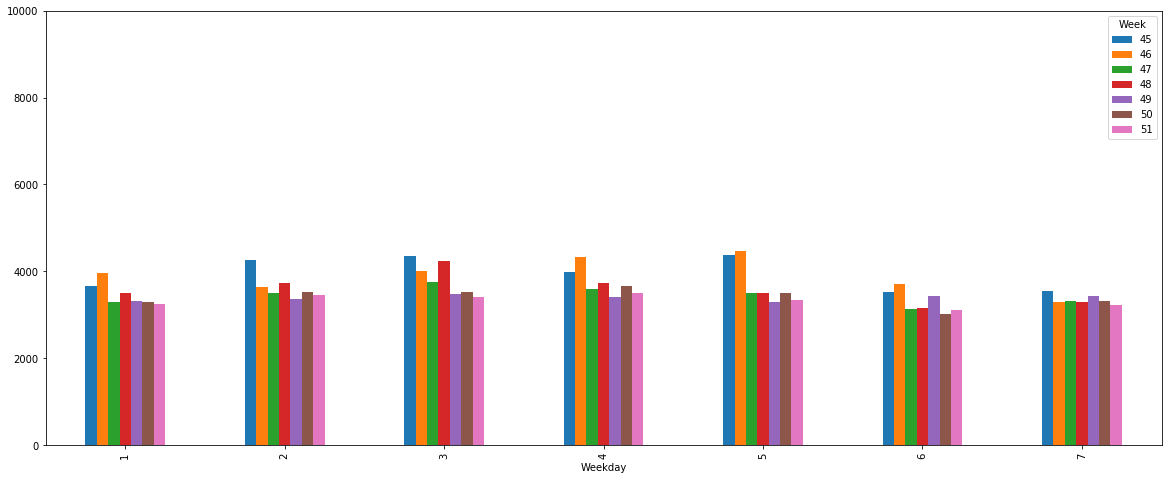

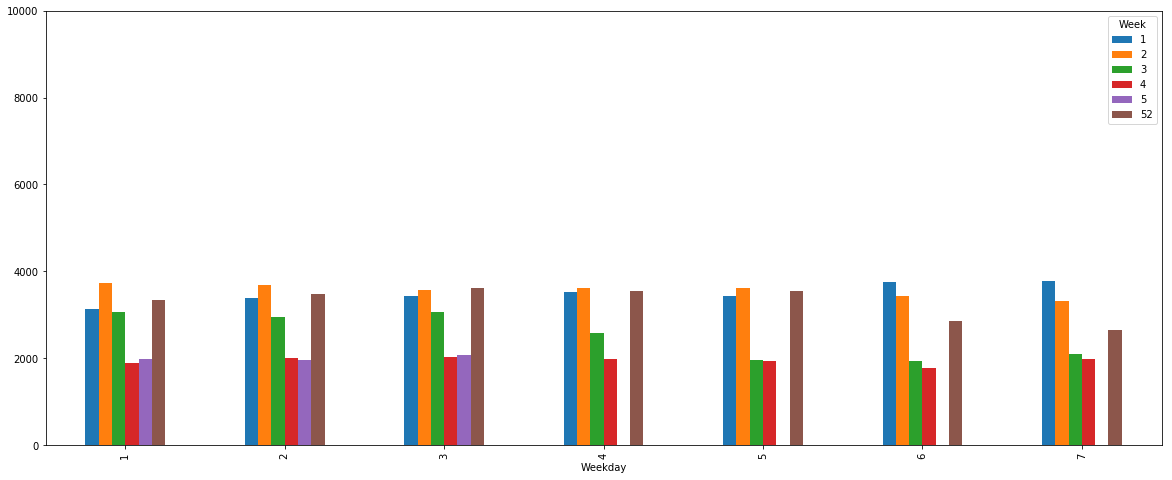

In [31]:
y_index = [0, 2000, 4000, 6000, 8000, 10000]

#資料第一段圖表(2017-08-01 ~ 2017-09-17)
df1.groupby(['Weekday','Week']).Cost.sum().unstack().plot.bar(legend = True, yticks = y_index)
#資料第二段圖表(2017-09-18 ~ 2017-11-05)
df2.groupby(['Weekday','Week']).Cost.sum().unstack().plot.bar(legend = True, yticks = y_index)
#資料第三段圖表(2017-11-06 ~ 2017-12-24)
df3.groupby(['Weekday','Week']).Cost.sum().unstack().plot.bar(legend = True, yticks = y_index)
#資料第四段圖表(2017-12-25 ~ 2017-01-31)
df4.groupby(['Weekday','Week']).Cost.sum().unstack().plot.bar(legend = True, yticks = y_index)
# 跟上一張圖的差別：可以看各周的變化

In [32]:
# 注意：取資料時，週五多一天
df.Weekday.value_counts()

3    648
2    647
7    624
5    624
4    624
1    622
6    619
Name: Weekday, dtype: int64

In [33]:
for i in range(53, 57):
    df.loc[i-53, 'Week'] = i
    
df.tail()

KeyError: "['Week'] not in index"

## 圖五 : 各周用電費用
### 觀察到的現象
- 開學(36周)後的用電量較高，隨著冬天的到來，用電漸漸降低
- 第3周後開始用電費用急遽下降，估計是開始放寒假了

Text(0.5,0,'Week')

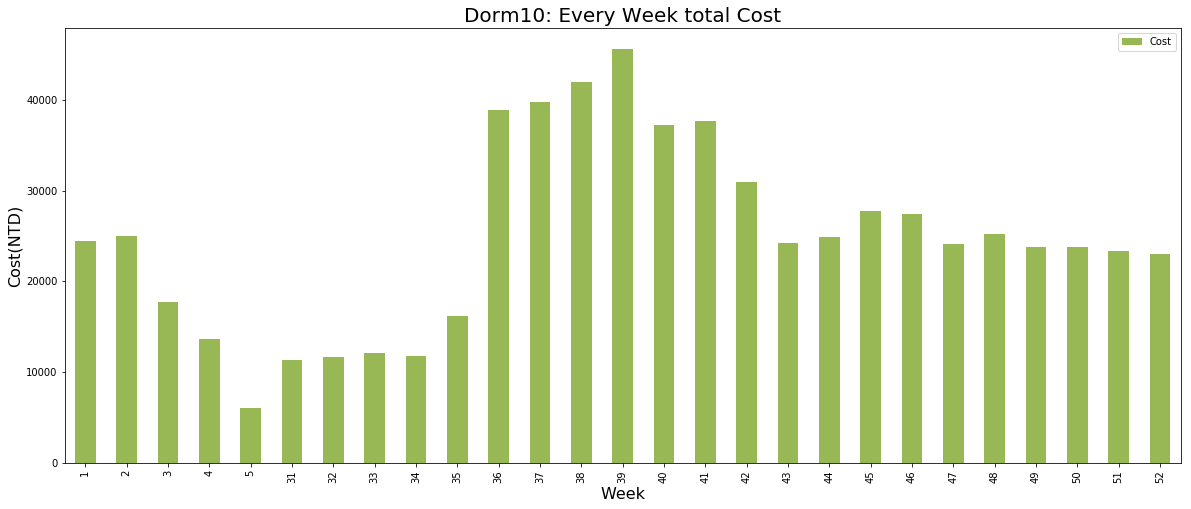

In [34]:


# df_dorm_12.groupby('Date').sum().Usage.plot.bar()
df.groupby('Week').sum().Cost.plot.bar(legend = True, color = cGreen)
plt.title('Dorm10: Every Week total Cost', fontsize = 20)
pylab.ylabel('Cost(NTD)',fontsize = 16)
pylab.xlabel('Week',fontsize = 16)

## 圖六：平均用電變化 - 依小時看
### 觀察到的現象
- 用電普遍集中在晚上(17:00 ~ 04:00)
- 12點大家上完課吃中餐，用電上升
- 用電最高峰在23:00，往後開始學生陸陸續續上床睡覺
- 用電最低峰在10:00，幾乎大家都跑去上課

### 疑惑
- 如果有段時間空無一人，則淨用電是多少?
- 可以去除寒暑假的用電
- 小時區間(用15分鐘去看)

Text(0.5,0,'Time')

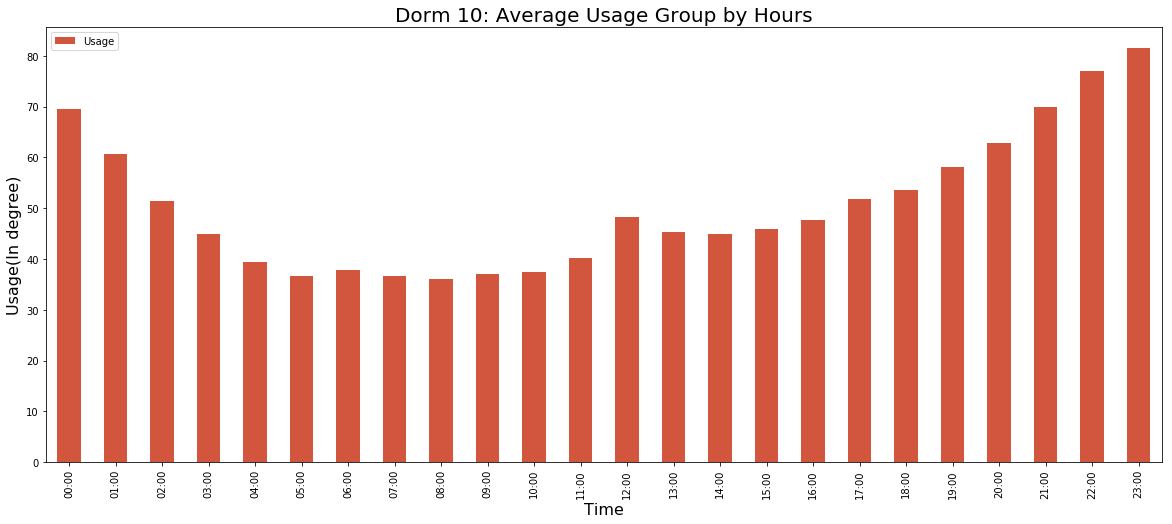

In [35]:
df.groupby('Time').Usage.mean().plot.bar(legend = True, color = cRed)
plt.title('Dorm 10: Average Usage Group by Hours', fontsize = 20)
pylab.ylabel('Usage(In degree)',fontsize = 16)
pylab.xlabel('Time',fontsize = 16)

### 觀察
- 這張是我覺得最有趣的，想法：可以拿去跟男生十舍比，看十二舍的人是不是比較早睡（省電）
- 最高用電落在晚上十一點到十二點。十二點會關燈。
- 關燈之後的下跌應該就是人為用電的減少（去睡覺了），人為用電除了桌電、吹風機以外，不知道洗澡熱水器有沒有被算在內？
- 早上七點起床有個Peak，可能是洗澡或開燈
- 中午十二點也有Peak，可能是回宿舍吃中飯
- 晚上六點開燈，所以用電升幅大

## 圖七 : 各Weekday隨時間用電變化圖
### 觀察到的現象
- 用電普遍集中在晚上
- 12點大家上完課回宿舍吃中餐，用電上升
- 起初周日用電較其他Weekday還要少，到了晚上逐漸提高，甚至比周五、周六用電還高
- 周五下午至晚上大家陸陸續續回去，用電提升趨緩，用電也較其他Weekday還少
- 週六早上有個Peak，不知原因，待觀察與討論

Text(0.5,0,'Time (hour)')

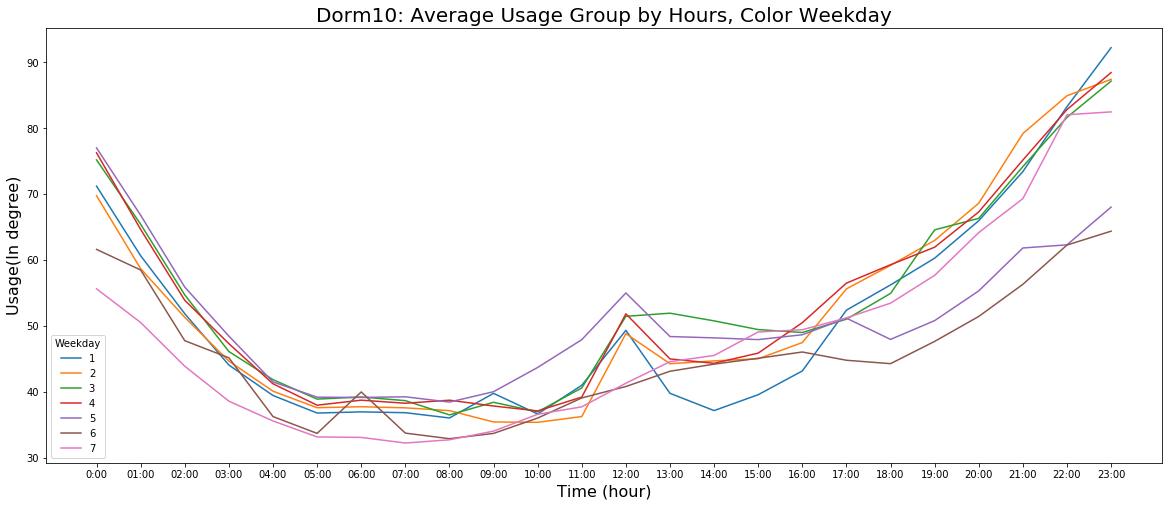

In [36]:
x_index = ('0:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00'
          , '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00')

df.groupby(['Time','Weekday']).Usage.mean().unstack().plot(legend = True)
plt.title('Dorm10: Average Usage Group by Hours, Color Weekday', fontsize = 20)
plt.xticks(np.arange(24), x_index)
pylab.ylabel('Usage(In degree)',fontsize = 16)
pylab.xlabel('Time (hour)',fontsize = 16)
#.Usage.plot(legend = True)

## 圖集八 : 每周隨時間的平均用電變化
### 觀察到的現象
- 普遍來說中午時段都有一個Peak
- 用電普遍集中在晚上
- 第一張圖 - 36、37周為開學期間
- 第四張圖 - 自第3周開始，用電逐漸下降，推測應是放寒假的時候

### 疑惑
- 第三段時間 - 早上時段有2個不正常的Peak，推測是當時網路不穩所導致

Text(0.5,1,'Semester Fourth Section Data')

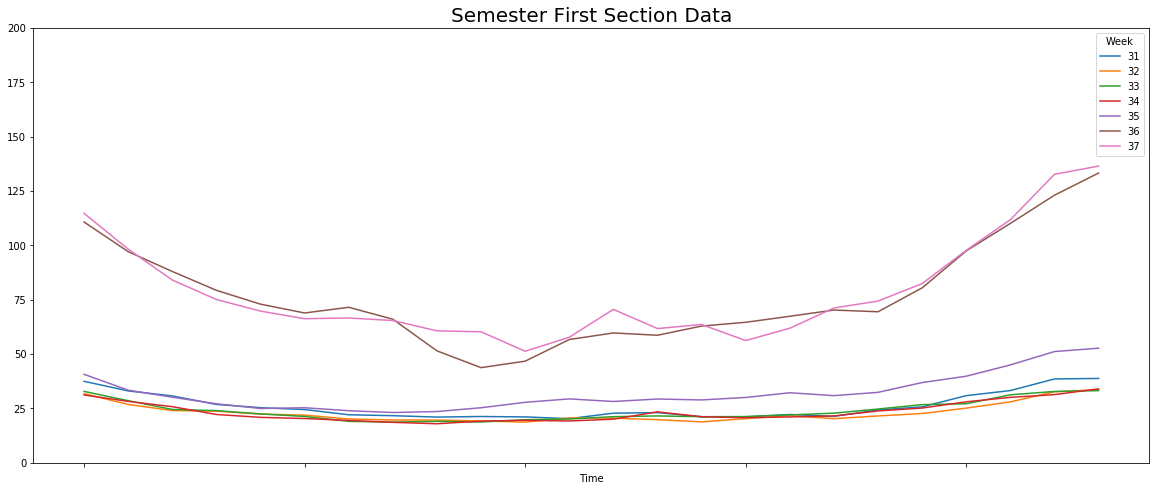

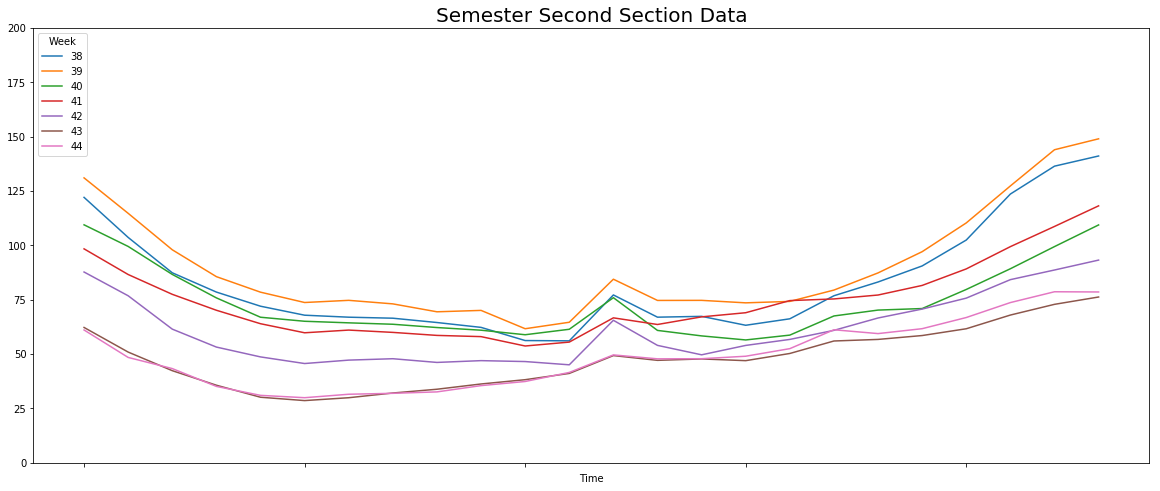

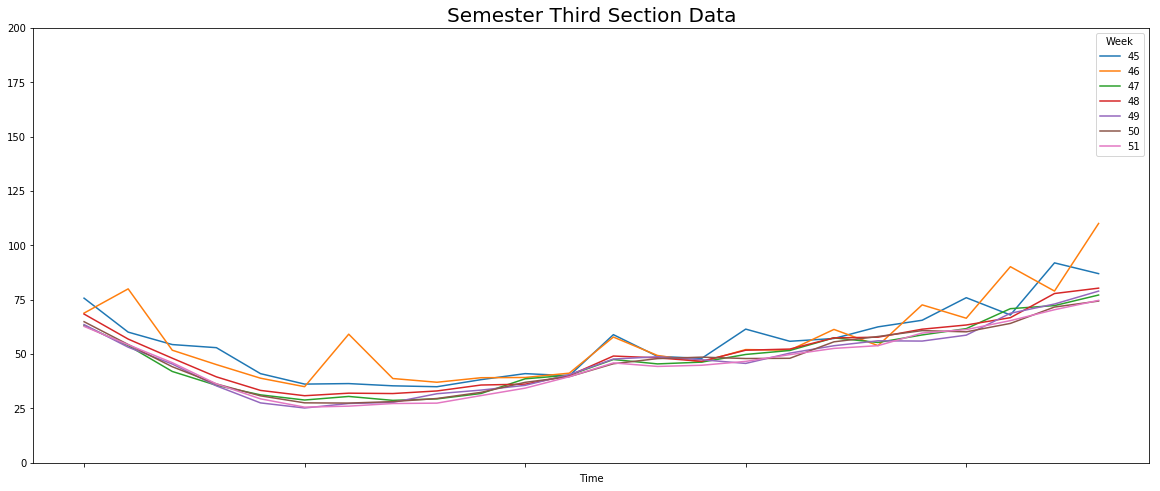

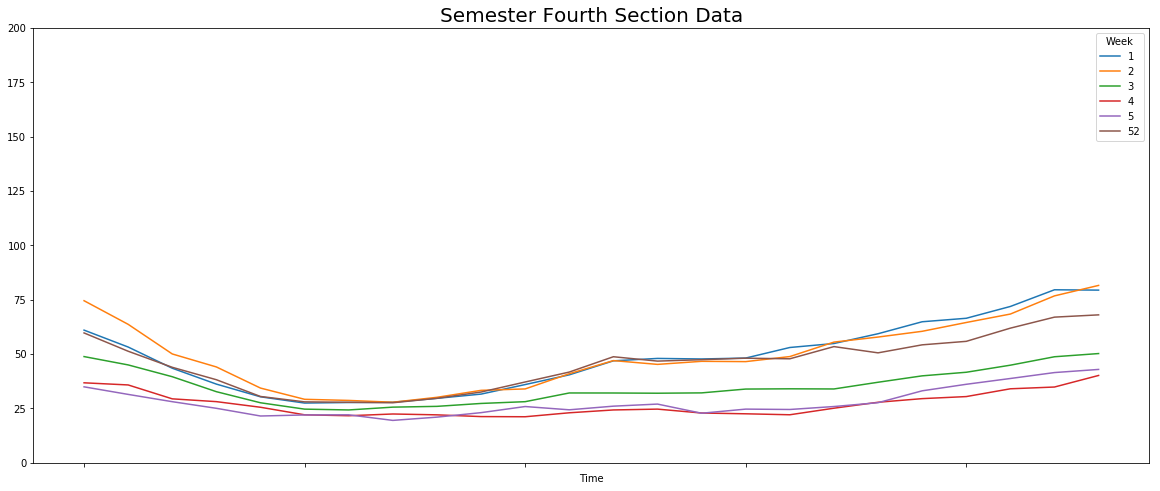

In [39]:
y_index = [0, 25, 50, 75, 100, 125, 150, 175, 200]

# 第一段資料 自 2017-08-01 至 2017-09-17 
df1.groupby(['Time','Week']).Usage.mean().unstack().plot(legend = True, yticks = y_index)
plt.title('Semester First Section Data', fontsize = 20)
# 第二段資料 自 2017-09-18 至 2017-11-05 
df2.groupby(['Time','Week']).Usage.mean().unstack().plot(legend = True, yticks = y_index)
plt.title('Semester Second Section Data', fontsize = 20)
# 第二段資料 自 2017-11-06 至 2017-12-24 
df3.groupby(['Time','Week']).Usage.mean().unstack().plot(legend = True, yticks = y_index)
plt.title('Semester Third Section Data', fontsize = 20)
# 第二段資料 自 2017-12-25 至 2018-01-31 
df4.groupby(['Time','Week']).Usage.mean().unstack().plot(legend = True, yticks = y_index)
plt.title('Semester Fourth Section Data', fontsize = 20)

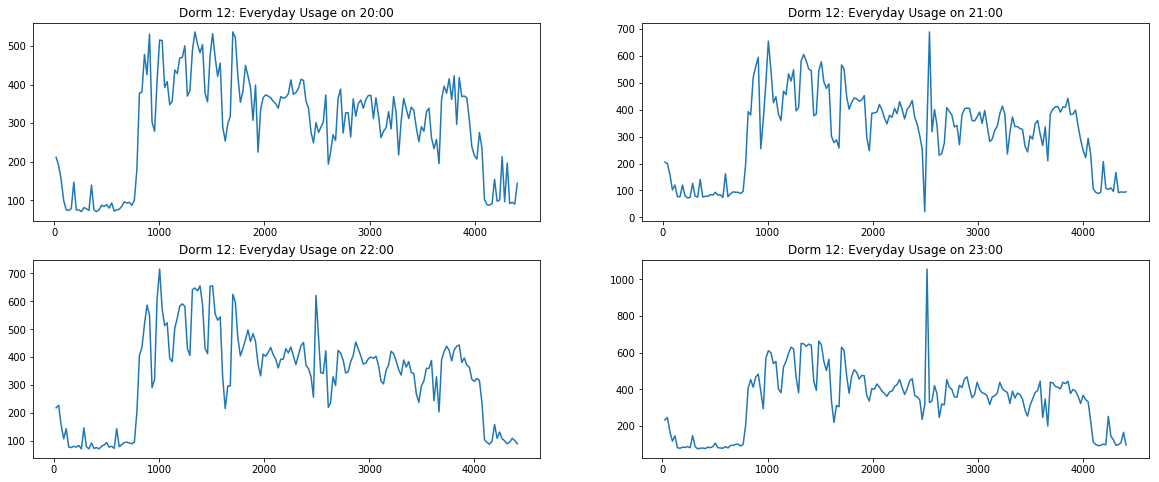

In [127]:
# 觀看某一個小時的用電量，在每天的變化

# df_dorm_12[df_dorm_12.Time == '23:00'].info()
fig, axes = plt.subplots(nrows=2, ncols=2)
df[df.Time == '20:00'].Cost.plot(ax=axes[0,0],title = 'Dorm 12: Everyday Usage on 20:00')
df[df.Time == '21:00'].Cost.plot(ax=axes[0,1],title = 'Dorm 12: Everyday Usage on 21:00')
df[df.Time == '22:00'].Cost.plot(ax=axes[1,0],title = 'Dorm 12: Everyday Usage on 22:00')
df[df.Time == '23:00'].Cost.plot(ax=axes[1,1],title = 'Dorm 12: Everyday Usage on 23:00')

## 成長率

In [40]:
# 使用 .pct_change()
df.groupby(['Week','Weekday']).mean().Cost.pct_change()[-20:]

Week  Weekday
50    2          0.073348
      3         -0.003074
      4          0.038822
      5         -0.044791
      6         -0.134004
      7          0.094071
51    1         -0.021000
      2          0.065007
      3         -0.013520
      4          0.030185
      5         -0.043758
      6         -0.074354
      7          0.039004
52    1          0.039734
      2          0.039065
      3          0.037166
      4         -0.020020
      5          0.002176
      6         -0.192302
      7         -0.078613
Name: Cost, dtype: float64

In [43]:
#探討peak的成因
df.groupby(['Week','Weekday']).mean().Cost.pct_change(-1).sort_values()[-10:]


Week  Weekday
3     3          0.182868
45    5          0.186496
38    5          0.210391
42    5          0.233289
52    5          0.238087
36    4          0.274319
3     4          0.310847
46    6          0.352390
40    5          0.779019
52    7               NaN
Name: Cost, dtype: float64

## 圖九 : Weekday隨小時用電成長率變化圖
### 觀察到的現象
- 中午的成長率在早上時段是最大的

### 疑惑
- 從圖表中可以發現，周六、周日晚上的用電成長率呈負成長，但正常來說晚上用電應逐漸提高，成長度應是正成長
- 凌晨時段(時段最前端)用電應是下降的，應呈負成長，但仍有些Weekday呈正成長 

### 疑惑成因推論
- 成長率是以每一筆資料與前一筆資料比較所得到的值，而以下groupby則是先以兩Weekday比較，再以更大的Time做比較，
    因此造成成長率並非按照x軸刻度比較

                   Usage      Week        Cost
Time  Weekday                                 
00:00 1        71.208077  34.50000  213.624231
      2        69.755926  34.37037  209.267778
      3        75.195556  34.37037  225.586667
      4        76.269231  35.50000  228.807692
      5        77.014231  35.50000  231.042692
      6        61.604000  35.08000  184.812000
      7        55.614231  35.50000  166.842692
01:00 1        60.638077  34.50000  181.914231
      2        58.663333  34.37037  175.990000
      3        65.418148  34.37037  196.254444
                  Usage      Week      Cost
Time  Weekday                              
00:00 1        0.020818  0.003772  0.020818
      2       -0.072340  0.000000 -0.072340
      3       -0.014077 -0.031821 -0.014077
      4       -0.009674  0.000000 -0.009674
      5        0.250150  0.011973  0.250150
      6        0.107702 -0.011831  0.107702
      7       -0.082850  0.028986 -0.082850
01:00 1        0.033662  0.003772  0.033

Text(0.5,0,'Hour')

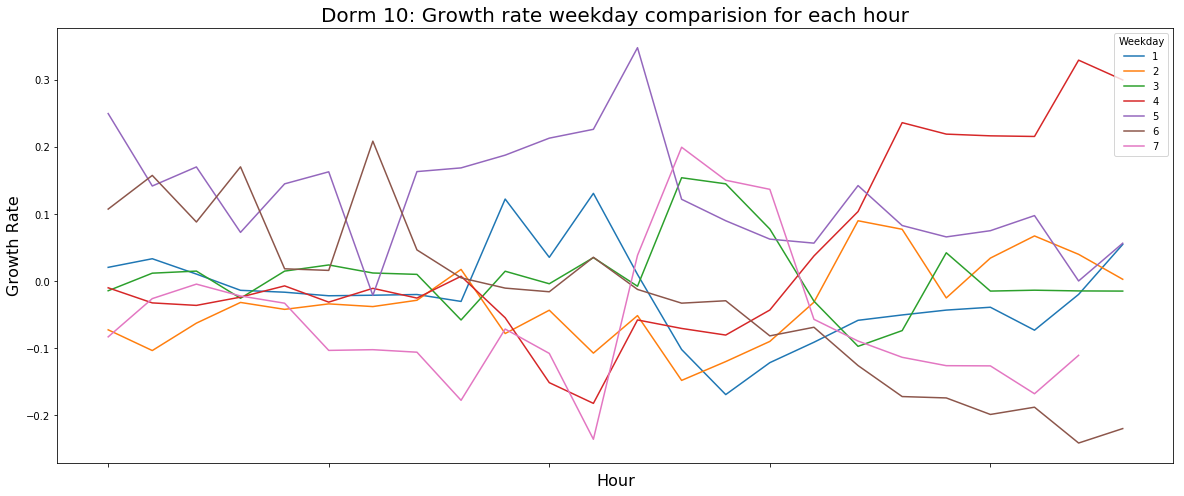

In [45]:
print(df.groupby(['Time','Weekday']).mean()[:10])
print(df.groupby(['Time','Weekday']).mean().pct_change(-1)[:10])
df.groupby(['Time','Weekday']).mean().Cost.pct_change(-1).unstack().plot()
plt.title('Dorm 10: Growth rate weekday comparision for each hour', fontsize = 20)
pylab.ylabel('Growth Rate',fontsize = 16)
pylab.xlabel('Hour',fontsize = 16) 

## 白天 / 晚上用電比率

In [46]:
# df_dorm_12.groupby(['Time','Weekday])
# df_dorm_12_night = df_dorm_12[((df_dorm_12.Time == '03:00') or (df_dorm_12.Time == '04:00') or (df_dorm_12.Time == '05:00'))]
df_dorm_10_night = df.loc[df['Time'].isin(['03:00', '04:00', '05:00', '06:00'])]
df_dorm_10_day = df.loc[df['Time'].isin(['07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00',
       '14:00', '15:00', '16:00', '17:00', '18:00'])]
df_dorm_10_night = df_dorm_10_night.groupby('Date').mean()# 夜晚用電
df_dorm_10_day = df_dorm_10_day.groupby('Date').mean()
(df_dorm_10_day/df_dorm_10_night).head()

,Usage,Weekday,Week,Cost
Date,,,,
2017-08-01,0.957727,1.0,1.0,0.957727
2017-08-02,0.900337,1.0,1.0,0.900337
2017-08-03,0.887762,1.0,1.0,0.887762
2017-08-04,0.826816,1.0,1.0,0.826816
2017-08-05,0.835707,1.0,1.0,0.835707


## 圖十 : 每日日夜用電圖(日: 07:00 ~ 18:00 / 夜: 03:00 ~ 06:00)
(日: 紅線 / 夜: 藍線 / 日夜用電比(日/夜): 綠線)
### 觀察到的現象
- 用電Peak應為平日，用電下跌應是周末或假日
- 起初日夜用電極低，此時應尚未開學；隨後有一段用電較高的時段，此時應有包含冷氣的用電；後面的用電下降，此時應不包含冷氣的用電
- 夜用電普遍較日用電高，尤其在平日較明顯

### 疑惑
- 夜用電有一個時段突然不正常的飆高

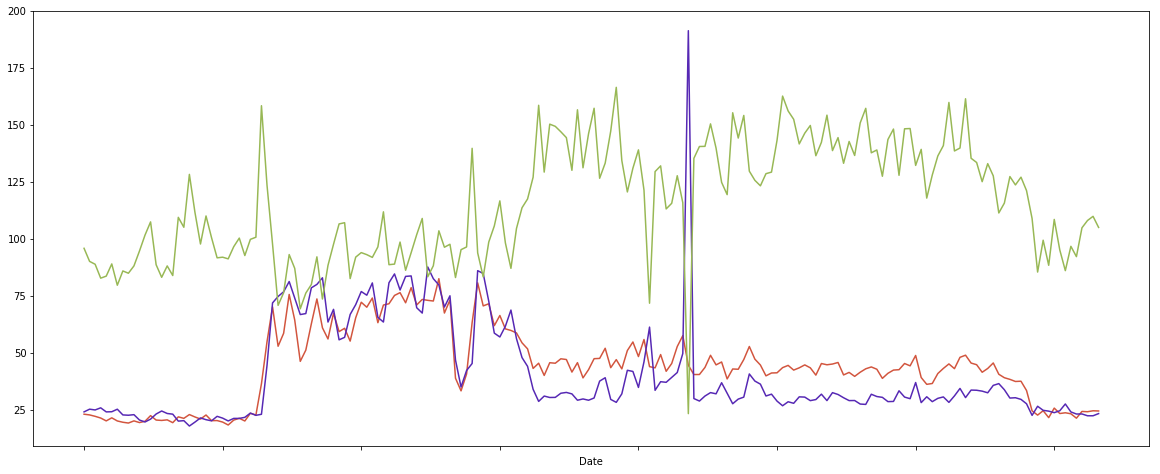

In [47]:
df_dorm_10_day.Usage.plot(color = cRed)
df_dorm_10_night.Usage.plot(color = cPurple)
((df_dorm_10_day/df_dorm_10_night).Usage*100).plot(color = cGreen) 
plt.legend = True
# bug ： 如何把兩個不同scale的圖畫再一起
# bug ： 如何畫線

## 圖十二 : 平日及周末隨時間用電變化圖
(平日: 藍線 / 周末: 紅線 / 用電差(平日-周末): 綠線)
### 觀察到的現象
- 平日較周末的用電還高，但也沒有很大的差距
- 即使周末沒有上課，早上時段(日用電)也較晚上低，推測應是大燈到晚上才開， 看來有留宿的人可能睡到晚上才起床，當然也因為周日晚上陸續有更多人回校
- 用電差基本上都是正的
- 平日因為有上課，中午時段有出現Peak

### 疑惑

In [22]:
df_dorm10_weekdays = df.loc[df['Weekday'].isin(['1', '2', '3', '4', '5'])]
df_dorm10_weekends = df.loc[df['Weekday'].isin(['6', '7'])]

df_dorm10_weekdays = df_dorm10_weekdays.groupby('Time')
df_dorm10_weekends = df_dorm10_weekends.groupby('Time')

([<matplotlib.axis.XTick at 0x1e47e69afd0>,
 <a list of 24 Text xticklabel objects>)

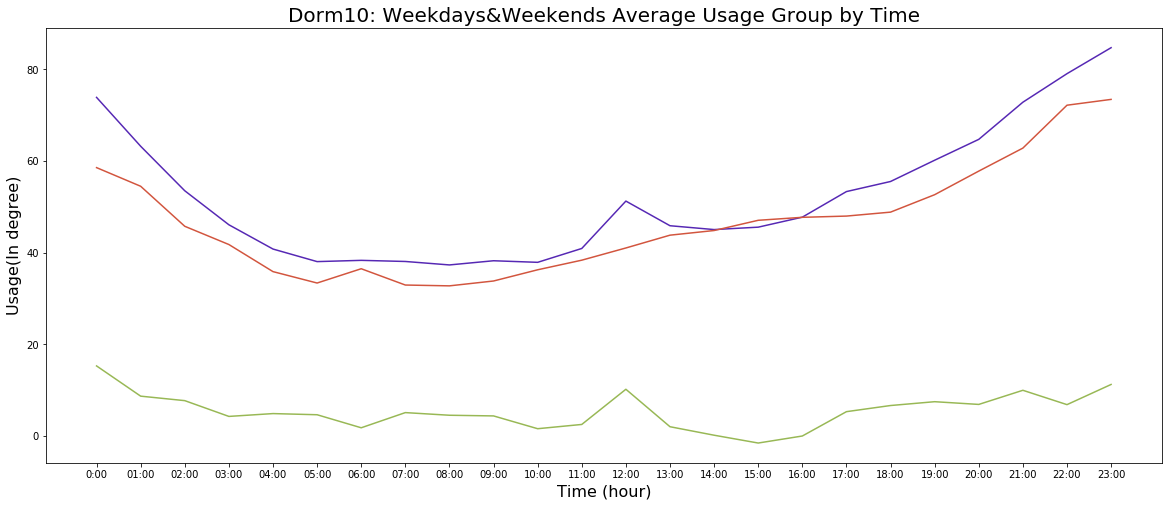

In [33]:
x_index = ('0:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00'
          , '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00')

df_dorm10_weekdays.Usage.mean().plot(color = cPurple)
df_dorm10_weekends.Usage.mean().plot(color = cRed)
((df_dorm10_weekdays.mean() - df_dorm10_weekends.mean()).Usage).plot(color = cGreen) 
plt.title('Dorm10: Weekdays&Weekends Average Usage Group by Time', fontsize = 20)
plt.xlabel('Time (hour)', fontsize = 16)
plt.ylabel('Usage(In degree)', fontsize = 16)
plt.xticks(np.arange(24), x_index)

## 圖十三: 期中考周與非期中考周 -- 每小時平均用電變化圖
(期中考周: 紅線 / 非期中考周: 藍線)
### 觀察到的現象
- 平時的用電較期中考周高一點
- 與十二舍不一樣，期中考周的早上沒有小山丘，但下午倒是有一個小Peak

### 疑惑
- 可是期中考周不是不關大燈嗎? 怎麼用電量還是小輸平時的用電?

In [12]:
# 期中考周
df_midex = df.loc[df['Week'].isin(['45', '2'])]
# 非期中考周(扣掉寒暑假用電)
df_normal = df.loc[~(df['Week'].isin(['31', '32', '33', '34', '35', '45', '2', '3', '4', '5']))]

def understand(df):
    for col_name in df.columns:
        print ('>>> "{}" has {} unique values:'.format(col_name, len(df[col_name].unique())))
        if(len(df[col_name].unique())<50):
            pprint.pprint(df[col_name].unique())
        else:
            pprint.pprint('The value is more than 50 so wont be list here :P')
        print('\n')

understand(df_normal)

>>> "DateTime" has 2849 unique values:
'The value is more than 50 so wont be list here :P'


>>> "Area" has 1 unique values:
array(['N'], dtype=object)


>>> "Building" has 1 unique values:
array(['D10'], dtype=object)


>>> "Loop" has 1 unique values:
array(['main'], dtype=object)


>>> "Type" has 1 unique values:
array(['dorm'], dtype=object)


>>> "Usage" has 1201 unique values:
'The value is more than 50 so wont be list here :P'


>>> "Date" has 119 unique values:
'The value is more than 50 so wont be list here :P'


>>> "Weekday" has 7 unique values:
array([1, 2, 3, 4, 5, 6, 7], dtype=int64)


>>> "Week" has 17 unique values:
array([36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52,  1], dtype=int64)


>>> "Time" has 24 unique values:
array(['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00',
       '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00',
       '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00',
       '21:00', '22:00', '2

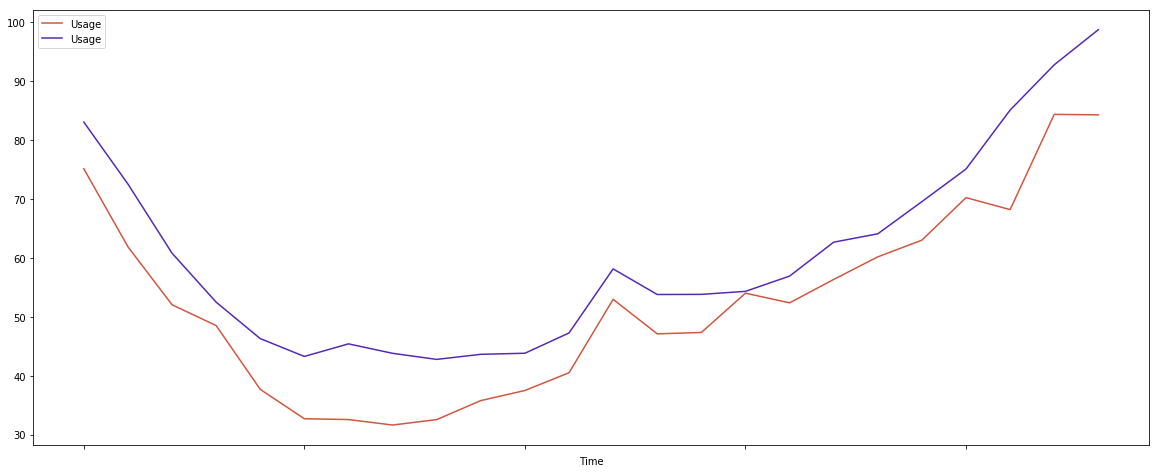

In [13]:
df_midex = df_midex.groupby('Time')
df_normal = df_normal.groupby('Time')

df_midex.Usage.mean().plot(color = cRed, legend = True)
df_normal.Usage.mean().plot(color = cPurple, legend = True)
plt.legend = True